In [3]:
# import necessary modules from keras
from keras.layers import Dense
from keras.models import Sequential

# creates a generic neural network architecture
model = Sequential()

# hidden layer takes a pre-processed frame as input, and has 200 units
model.add(Dense(units=200,input_dim=80*80, activation='relu', kernel_initializer='glorot_uniform'))

# output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='RandomNormal'))

# compile the model using traditional Machine Learning losses and optimizers
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [10]:
import gym
import random
import os

# Frame list collector
frames = []
STEPS = 1000

# code for the two only actions in Pong
UP_ACTION = 2
DOWN_ACTION = 3

# initializing our environment
env = gym.make("Pong-v0")

# beginning of an episode
observation = env.reset()

# load pre-trained model if exist
if (os.path.isfile('my_model_weights.h5')):
    print("loading previous weights")
    model.load_weights('my_model_weights.h5')

loading previous weights


In [11]:
from karpathy import prepro, discount_rewards
import numpy as np

prev_input = None

# main loop
for i in range(STEPS):
    # choose random action
     # preprocess the observation, set input as difference between images
    cur_input = prepro(observation)
    x = cur_input - prev_input if prev_input is not None else np.zeros(80 * 80)
    prev_input = cur_input
    
    # forward the policy network and sample action according to the proba distribution
    proba = model.predict(np.expand_dims(x, axis=1).T)
    action = UP_ACTION if np.random.uniform() < proba else DOWN_ACTION

    #run one step
    observation, reward, done, info = env.step(action)
    frames.append(observation) # collecting observation

    # if episode is over, reset to beginning
    if done:
        observation = env.reset()
        frames.append(observation) # collecting observation

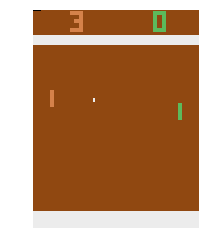

In [12]:
from support import save_frames_as_gif
from matplotlib import animation

# Save the run
save_frames_as_gif(frames, filename='pong-1000-steps.gif')